<a href="https://colab.research.google.com/github/simonamazzarino/talk_slides/blob/main/2025_PyCon_IT_eurostat/eurostat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install eurostat matplotlib

In [1]:
import eurostat
import matplotlib.pyplot as plt

The function below reads the Eurostat table of contents and returns it as a list of tuples. The first tuple contains the header row. All dates are represented as strings.

The **agency** parameter specifies which agencies' tables of contents to retrieve. It can be a single string or a list of strings. Supported agencies include: 'EUROSTAT', 'COMEXT', 'COMP', 'EMPL', and 'GROW'.

The **lang** parameter determines the language of the table of contents. Supported values are 'en' (English), 'fr' (French), and 'de' (German), depending on availability from Eurostat. The default is 'en'.

In [2]:
toc = eurostat.get_toc(agency='EUROSTAT', lang='en')
toc

[('title',
  'code',
  'type',
  'last update of data',
  'last table structure change',
  'data start',
  'data end'),
 ('Distribution of digital platform workers (at least one hour in the last month) by consequences of rejecting the task or service - experimental statistics',
  'LFST_DPW_09',
  'dataset',
  '2024-07-17T23:00:00+0200',
  '2024-07-17T23:00:00+0200',
  '2022',
  '2022'),
 ('Distribution of digital platform workers (at least one hour in the last month) by working hours setting - experimental statistics',
  'LFST_DPW_10',
  'dataset',
  '2024-07-17T23:00:00+0200',
  '2024-07-17T23:00:00+0200',
  '2022',
  '2022'),
 ('Distribution of digital platform workers (at least one hour in the last month) by price setting - experimental statistics',
  'LFST_DPW_11',
  'dataset',
  '2024-07-17T23:00:00+0200',
  '2024-07-17T23:00:00+0200',
  '2022',
  '2022'),
 ('Percentage of employed adults having a second job by sex, age groups, number of children and age of the youngest child',
  

In [3]:
toc[0]

('title',
 'code',
 'type',
 'last update of data',
 'last table structure change',
 'data start',
 'data end')

In [4]:
toc[1]

('Distribution of digital platform workers (at least one hour in the last month) by consequences of rejecting the task or service - experimental statistics',
 'LFST_DPW_09',
 'dataset',
 '2024-07-17T23:00:00+0200',
 '2024-07-17T23:00:00+0200',
 '2022',
 '2022')

Read the table of contents of the main database and return a pandas dataframe with all the available datasets for the chosen agency.

In [6]:
toc_df = eurostat.get_toc_df(agency='EUROSTAT', lang='en')
toc_df

,title,code,type,last update of data,last table structure change,data start,data end
0,Distribution of digital platform workers (at l...,LFST_DPW_09,dataset,2024-07-17T23:00:00+0200,2024-07-17T23:00:00+0200,2022,2022
1,Distribution of digital platform workers (at l...,LFST_DPW_10,dataset,2024-07-17T23:00:00+0200,2024-07-17T23:00:00+0200,2022,2022
2,Distribution of digital platform workers (at l...,LFST_DPW_11,dataset,2024-07-17T23:00:00+0200,2024-07-17T23:00:00+0200,2022,2022
3,Percentage of employed adults having a second ...,LFST_HH2JCHI,dataset,2025-04-15T11:00:00+0200,2025-04-15T11:00:00+0200,2006,2024
4,Percentage of employed people having a second ...,LFST_HH2JTY,dataset,2025-04-15T11:00:00+0200,2025-04-15T11:00:00+0200,2006,2024
...,...,...,...,...,...,...,...
7937,Recycling rate of municipal waste,SDG_11_60,dataset,2025-02-13T11:00:00+0100,2025-02-13T11:00:00+0100,2000,2023
7938,Consumption of chemicals by hazardousness - EU...,SDG_12_10,dataset,2024-12-12T23:00:00+0100,2024-12-12T23:00:00+0100,2004,2023
7939,Raw material consumption (RMC),SDG_12_21,dataset,2025-03-31T11:00:00+0200,2024-08-01T23:00:00+0200,2000,2023
7940,Consumption footprint - single weighted score,SDG_12_31,dataset,2025-03-26T23:00:00+0100,2025-03-26T23:00:00+0100,2010,2023


For example, if we are interested in studying the immigration in EU, we can select the dataset below using its code.

In [7]:
eurostat.get_toc_df(dataset = "migr_imm1ctz")

,title,code,type,last update of data,last table structure change,data start,data end
0,"Immigration by age group, sex and citizenship",MIGR_IMM1CTZ,dataset,2025-04-10T23:00:00+0200,2025-04-10T23:00:00+0200,1998,2023


The code below allows to search through all the datasets selected above, the ones containing the string "immigration". \
In this way it's easier to find the code of the specific dataset that you're looking for.

In [ ]:
eurostat.subset_toc_df(toc_df, "immigration")

,title,code,type,last update of data,last table structure change,data start,data end
432,Persons subject to immigration law enforcement...,MIGR_EILPOP,dataset,2024-09-30T23:00:00+0200,2024-05-30T23:00:00+0200,2008,2023
452,"Immigration by age group, sex and level of hum...",MIGR_IMM10CTB,dataset,2025-04-10T23:00:00+0200,2025-04-10T23:00:00+0200,2013,2023
453,"Immigration by age group, sex and level of hum...",MIGR_IMM11PRV,dataset,2025-04-10T23:00:00+0200,2025-04-10T23:00:00+0200,2013,2023
454,Immigration by broad group of country of previ...,MIGR_IMM12PRV,dataset,2025-04-10T23:00:00+0200,2025-04-10T23:00:00+0200,2013,2023
455,"Immigration by age group, sex and citizenship",MIGR_IMM1CTZ,dataset,2025-04-10T23:00:00+0200,2025-04-10T23:00:00+0200,1998,2023
456,"Immigration by age, sex and group of citizenship",MIGR_IMM2CTZ,dataset,2025-04-10T23:00:00+0200,2025-04-10T23:00:00+0200,1998,2023
457,"Immigration by age group, sex and country of b...",MIGR_IMM3CTB,dataset,2025-04-10T23:00:00+0200,2025-04-10T23:00:00+0200,2008,2023
458,"Immigration by age, sex and group of country o...",MIGR_IMM4CTB,dataset,2025-04-10T23:00:00+0200,2025-04-10T23:00:00+0200,2008,2023
459,"Immigration by age group, sex and country of p...",MIGR_IMM5PRV,dataset,2025-04-10T23:00:00+0200,2025-04-10T23:00:00+0200,1998,2023
460,"Immigration by sex, citizenship and group of c...",MIGR_IMM6CTZ,dataset,2025-04-10T23:00:00+0200,2025-04-10T23:00:00+0200,2008,2023


***.get_pars()*** shows the attributes contained in the specific dataset. \
***.get_dict()*** shows a data dictionary for the attributes in the dataset. \
***.get_pars_values()*** shows the values for a given attributes.

In [10]:
eurostat.get_pars("migr_imm1ctz")

['freq', 'citizen', 'agedef', 'age', 'unit', 'sex', 'geo']

In [11]:
eurostat.get_dic('migr_imm1ctz')

[('freq',
  'Time frequency',
  'This code list contains the periodicity that refers to the frequency.'),
 ('citizen',
  'Country of citizenship',
  'The country of citizenship is the country in which a person is born (and has not renounced or lost citizenship) or naturalized whether by declaration, choice, marriage or other means according to national legislation, and to which that person owes allegiance and by which he or she is entitled to be protected.'),
 ('agedef',
  'Age definition',
  'This code list defines the modes of counting the age.'),
 ('age',
  'Age class',
  'This code list contains periods of time, i.e. the length of time that a person or an animal has lived or a plant or an entity related to human beings has existed. Age is usually measured in completed years, months, weeks, days, hours or minutes of life, as appropriate. Apart from that, the age of a means of transport is defined as: Length of time after the first registration of a means of transport as new.'),
 ('u

In [12]:
eurostat.get_par_values('migr_imm1ctz', 'sex')

['T', 'M', 'F']

In [15]:
eurostat.get_dic('migr_imm1ctz', 'sex', frmt='df')

,val,descr
0,T,Total
1,M,Males
2,F,Females
3,DIFF,Absolute difference between males and females
4,NAP,Not applicable
5,NRP,No response
6,UNK,Unknown


In [16]:
eurostat.get_dic('migr_imm1ctz', 'agedef', frmt='df')

,val,descr
0,REACH,Age reached during the year
1,COMPLET,Age in completed years


***.get_data_df()*** returns a pandas dataframe for the specified dataset. 

***flag=True*** downloads also the flags associated to the data. \
Pay attention: the data format changes if flags is True or not. \
Flag meanings can be found [here](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Tutorial:Symbols_and_abbreviations#Statistical_symbols.2C_abbreviations_and_units_of_measurement).


In [19]:
df = eurostat.get_data_df(code = "migr_imm1ctz", flags=True)
df

,freq,citizen,agedef,age,unit,sex,geo\TIME_PERIOD,1998_value,1998_flag,1999_value,...,2019_value,2019_flag,2020_value,2020_flag,2021_value,2021_flag,2022_value,2022_flag,2023_value,2023_flag
0,A,AD,COMPLET,TOTAL,NR,F,AT,0.0,,0.0,...,0.0,,0.0,,0.0,,0.0,,0.0,
1,A,AD,COMPLET,TOTAL,NR,F,BE,NaN,:,NaN,...,0.0,,NaN,:,NaN,:,NaN,:,2.0,
2,A,AD,COMPLET,TOTAL,NR,F,BG,NaN,:,NaN,...,0.0,p,0.0,p,0.0,,0.0,,0.0,
3,A,AD,COMPLET,TOTAL,NR,F,CH,0.0,,0.0,...,0.0,,3.0,,NaN,:,NaN,:,NaN,:
4,A,AD,COMPLET,TOTAL,NR,F,CZ,NaN,:,NaN,...,0.0,,0.0,,0.0,,0.0,,0.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097615,A,ZW,REACH,Y_LT5,NR,T,NO,1.0,,0.0,...,1.0,,1.0,,NaN,:,NaN,:,NaN,:
1097616,A,ZW,REACH,Y_LT5,NR,T,PT,NaN,:,NaN,...,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:
1097617,A,ZW,REACH,Y_LT5,NR,T,RU,NaN,:,NaN,...,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:
1097618,A,ZW,REACH,Y_LT5,NR,T,SE,5.0,,1.0,...,2.0,,2.0,,8.0,,1.0,,2.0,


The argument ***filter_pars*** allows to select specific values for the given attributes.

In [20]:
df = eurostat.get_data_df(code = "migr_imm1ctz", filter_pars = {'citizen': "IT", 'geo': ["ES"], 'sex': ['F', 'M'], 'age': 'TOTAL', 'agedef': 'COMPLET', 'startPeriod': 2023,}, flags=True)
df

,freq,citizen,agedef,age,unit,sex,geo\TIME_PERIOD,2023_value,2023_flag
0,A,IT,COMPLET,TOTAL,NR,F,ES,22633.0,
1,A,IT,COMPLET,TOTAL,NR,M,ES,25456.0,


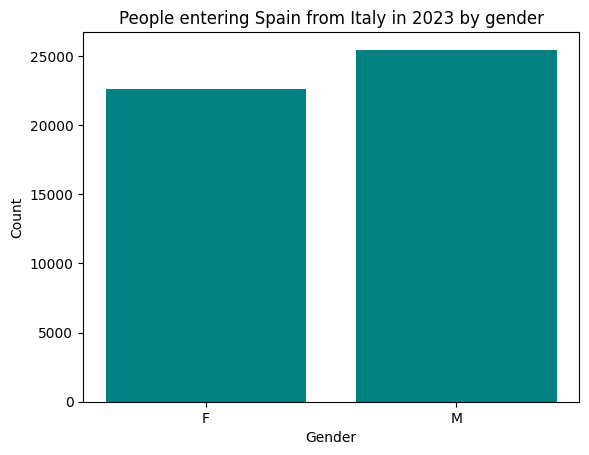

In [21]:
plt.bar(df['sex'], df['2023_value'], color='teal')
plt.title('People entering Spain from Italy in 2023 by gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()